In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('data/new_churn_data.csv')

In [3]:
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [4]:
user_identifier = dataset['user']
dataset = dataset.drop(columns=['user'])

In [5]:
#one hot encoding
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [6]:
#add dummy variables
dataset = pd.get_dummies(dataset)

In [8]:
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [9]:
#avoid dummy variable trap by removing one varible from encoded
dataset = dataset.drop(columns=['housing_na','zodiac_sign_na','payment_type_na'])

In [11]:
#splitting the dataset in to training and test set
from sklearn.model_selection import train_test_split


In [12]:
X = dataset.drop(columns='churn')
y= dataset['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [15]:
#balancing the training set

In [16]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [17]:
pos_index = y_train[y_train.values==1].index
neg_index = y_train[y_train.values==0].index

In [18]:
if (len(pos_index) > len(neg_index)):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index

In [23]:
import random
random.seed(0)
higher = np.random.choice(higher,size=len(lower))
lower = np.asarray(lower)

In [25]:
new_indexes = np.concatenate((lower,higher))

In [28]:
X_train = X_train.loc[new_indexes,]
y_train = y_train.loc[new_indexes]

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\rajit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [30]:
X_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.622520,-0.355271,-0.27678,-0.583203,-0.355178,-0.169226,-0.917044,-0.074076,-0.077107,-0.550233,...,-0.306342,-0.159944,-0.295175,-0.312743,-0.293043,-0.295846,-0.289427,-0.291125,-0.295287,-0.317888
19766,-0.420819,-0.355271,-0.27678,-0.629483,-0.355178,-0.169226,0.297803,1.295610,-0.077107,-0.550233,...,-0.306342,-0.159944,-0.295175,-0.312743,3.412474,-0.295846,-0.289427,-0.291125,-0.295287,-0.317888
8354,0.285134,-0.355271,-0.27678,-0.629483,-0.355178,-0.169226,1.962595,-0.074076,-0.077107,-0.242994,...,-0.306342,-0.159944,-0.295175,-0.312743,-0.293043,-0.295846,-0.289427,-0.291125,-0.295287,3.145758
17883,0.587685,-0.355271,-0.27678,0.018434,-0.355178,-0.169226,-0.197135,-0.074076,-0.077107,-0.012565,...,-0.306342,-0.159944,-0.295175,-0.312743,-0.293043,-0.295846,-0.289427,-0.291125,3.386535,-0.317888
25149,-0.824220,-0.243062,-0.27678,-0.120405,-0.240578,-0.169226,-0.590835,-0.074076,-0.077107,-0.242994,...,-0.306342,-0.159944,-0.295175,-0.312743,-0.293043,3.380132,-0.289427,-0.291125,-0.295287,-0.317888


In [31]:
X_test.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
2834,-0.017418,0.879023,-0.276780,-0.606343,0.905427,1.967605,1.208939,-0.074076,-0.077107,1.754056,...,-0.306342,-0.159944,-0.295175,-0.312743,-0.293043,-0.295846,3.455108,-0.291125,-0.295287,-0.317888
21018,-0.723370,-0.355271,-0.276780,2.332425,-0.355178,-0.169226,1.670131,-0.074076,-0.077107,-0.396613,...,-0.306342,-0.159944,3.387819,-0.312743,-0.293043,-0.295846,-0.289427,-0.291125,-0.295287,-0.317888
5590,1.495338,0.879023,1.542307,-0.629483,0.905427,-0.169226,0.410289,2.665297,-0.077107,2.061294,...,-0.306342,-0.159944,-0.295175,-0.312743,-0.293043,-0.295846,-0.289427,-0.291125,3.386535,-0.317888
15769,0.083433,-0.355271,-0.276780,-0.444364,-0.355178,-0.169226,-1.007033,-0.074076,-0.077107,-0.550233,...,-0.306342,6.252175,-0.295175,-0.312743,-0.293043,-0.295846,-0.289427,-0.291125,-0.295287,-0.317888
15120,-1.025921,0.317981,-0.276780,3.003482,0.332425,-0.169226,1.703877,-0.074076,-0.077107,1.984484,...,-0.306342,-0.159944,-0.295175,3.197516,-0.293043,-0.295846,-0.289427,-0.291125,-0.295287,-0.317888


In [33]:
#fitting model to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
#eveluate results
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [36]:
cm = confusion_matrix(y_test,y_pred)

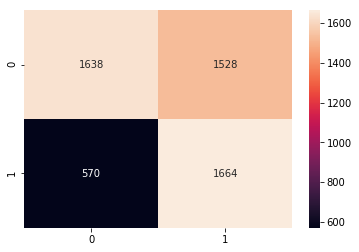

In [48]:
sns.heatmap(cm,annot=True,fmt='g')

In [39]:
accuracy_score(y_test,y_pred)

0.6114814814814815

In [40]:
precision_score(y_test,y_pred)

0.5213032581453634

In [41]:
recall_score(y_test,y_pred)

0.7448522829006267

In [42]:
f1_score(y_test,y_pred)

0.6133431625506819

In [49]:
#K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)

C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [50]:
accuracies

array([0.64597315, 0.65995526, 0.64876957, 0.63255034, 0.64709172,
       0.6303132 , 0.63926174, 0.64876957, 0.66387025, 0.65380313])

In [59]:
accuracies.mean()


0.6470357941834453

In [60]:
#analysing coefficients
pd.concat([pd.DataFrame(X_train.columns,columns=['features']),pd.DataFrame(np.transpose(classifier.coef_),columns=['coef'])],axis=1)

,features,coef
0,age,-0.168789
1,deposits,0.430030
2,withdrawal,0.033123
3,purchases_partners,-0.760010
4,purchases,-0.526928
5,cc_taken,0.077486
6,cc_recommended,0.023243
7,cc_disliked,-0.014621
8,cc_liked,-0.009515
9,cc_application_begin,0.029312


In [61]:
#Feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
X_train.shape

(17880, 41)

we can reduce number of columns(40 columns to 20 or something) but keep the initial accuracy.. this will help to minimize the size of the dataset in production

In [63]:
classifier = LogisticRegression()
rfe = RFE(estimator=classifier,n_features_to_select=20)
rfe = rfe.fit(X_train,y_train)

C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [64]:
#summarize the selection 
rfe.support_

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False])

In [65]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'web_user', 'android_user', 'registered_phones',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'housing_O', 'payment_type_Semi-Monthly', 'payment_type_Weekly',
       'zodiac_sign_Gemini'],
      dtype='object')

In [66]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1, 14, 17, 20,  3, 21,  1, 16,  1,  1,  1,  1,
        1,  1,  1,  1,  1, 15,  1, 13, 12, 19,  1,  1,  2, 11, 22, 18,  1,
        4,  6, 10,  8,  5,  9,  7])

In [68]:
#refit the model with this selected 20 columns
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train[X_train.columns[rfe.support_]],y_train)

C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

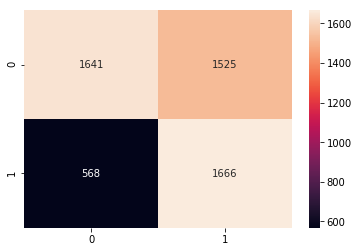

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')

In [71]:
accuracy_score(y_test,y_pred)

0.6124074074074074

In [72]:
precision_score(y_test,y_pred)

0.5220933876527735

In [73]:
recall_score(y_test,y_pred)

0.7457475380483438

In [74]:
f1_score(y_test,y_pred)

0.6141935483870968

what we can see is its still same accuracies as first even if we removed 20 columns which are actually do nothing to model

In [75]:
#analyzing coefficients
pd.concat([pd.DataFrame(X_train.columns[rfe.support_],columns=['features']),pd.DataFrame(np.transpose(classifier.coef_),columns=['coef'])],axis=1)

,features,coef
0,age,-0.163802
1,deposits,0.435412
2,withdrawal,0.035110
3,purchases_partners,-0.745552
4,purchases,-0.521398
5,cc_taken,0.081037
6,web_user,0.125659
7,android_user,-0.061833
8,registered_phones,0.098494
9,waiting_4_loan,-0.032065


In [76]:
#Formatting final results

final_results = pd.concat([y_test,user_identifier],axis=1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user','churn','predicted_churn']].reset_index(drop=True)

In [77]:
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
5,28827,0.0,0
6,58305,1.0,0
7,2351,0.0,1
8,11790,0.0,1
9,46727,0.0,0
